# Tidy data in Pandas

### Handy hints 

* In general, we are using plotting libraries that return objects encapsulating the plot. You can check the type of these returned objects with `type()`. Jupyter's tools for exploring objects and methods will also be useful: the `?` and `??` operators, and tab autocompletion.

## Setup 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# This causes Jupyter to display any matplotlib plots directly in the notebook
# It also works for seaborn, since seaborn uses matplotlib to render plots
# There is an alterative `%matplotlib notebook` magic for interactivity, which we won't use today
# - we will use other libraries for interactive plots
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

## Pandas warm-up 

In [10]:
iris = sns.load_dataset('iris')

In [11]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [13]:
iris.shape

(150, 5)

In [14]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
iris['sepal_shape'] = iris['sepal_length'] / iris['sepal_width']

In [16]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_shape
0,5.1,3.5,1.4,0.2,setosa,1.457143
1,4.9,3.0,1.4,0.2,setosa,1.633333
2,4.7,3.2,1.3,0.2,setosa,1.468750
3,4.6,3.1,1.5,0.2,setosa,1.483871
4,5.0,3.6,1.4,0.2,setosa,1.388889


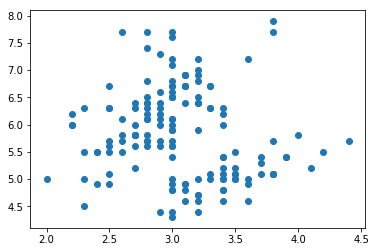

In [17]:
fig, ax = plt.subplots()
ax.scatter(x=iris['sepal_width'],y=iris['sepal_length'])

## Tidy data 

We can manipulate data using the column names and index, with `stack` and `unstack`.

We can manipulate data using particular columns, with `melt` and `pivot` or `pivot_table`.

In [18]:
iris.index = ['Flower_{}'.format(n+1) for n in range(len(iris))]
iris.index.name = 'Sample'

In [19]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_shape
Sample,,,,,,
Flower_1,5.1,3.5,1.4,0.2,setosa,1.457143
Flower_2,4.9,3.0,1.4,0.2,setosa,1.633333
Flower_3,4.7,3.2,1.3,0.2,setosa,1.468750
Flower_4,4.6,3.1,1.5,0.2,setosa,1.483871
Flower_5,5.0,3.6,1.4,0.2,setosa,1.388889


In [20]:
iris.melt()

,variable,value
0,sepal_length,5.1
1,sepal_length,4.9
2,sepal_length,4.7
3,sepal_length,4.6
4,sepal_length,5
5,sepal_length,5.4
6,sepal_length,4.6
7,sepal_length,5
8,sepal_length,4.4
9,sepal_length,4.9


In [21]:
iris.reset_index(inplace=True)

In [22]:
iris.head()

,Sample,sepal_length,sepal_width,petal_length,petal_width,species,sepal_shape
0,Flower_1,5.1,3.5,1.4,0.2,setosa,1.457143
1,Flower_2,4.9,3.0,1.4,0.2,setosa,1.633333
2,Flower_3,4.7,3.2,1.3,0.2,setosa,1.468750
3,Flower_4,4.6,3.1,1.5,0.2,setosa,1.483871
4,Flower_5,5.0,3.6,1.4,0.2,setosa,1.388889


In [23]:
iris.melt(id_vars=['Sample']).head()

,Sample,variable,value
0,Flower_1,sepal_length,5.1
1,Flower_2,sepal_length,4.9
2,Flower_3,sepal_length,4.7
3,Flower_4,sepal_length,4.6
4,Flower_5,sepal_length,5


In [24]:
iris.melt(id_vars=['Sample']).pivot(index='Sample',columns='variable',values='value')

variable,petal_length,petal_width,sepal_length,sepal_shape,sepal_width,species
Sample,,,,,,
Flower_1,1.4,0.2,5.1,1.45714,3.5,setosa
Flower_10,1.5,0.1,4.9,1.58065,3.1,setosa
Flower_100,4.1,1.3,5.7,2.03571,2.8,versicolor
Flower_101,6,2.5,6.3,1.90909,3.3,virginica
Flower_102,5.1,1.9,5.8,2.14815,2.7,virginica
Flower_103,5.9,2.1,7.1,2.36667,3,virginica
Flower_104,5.6,1.8,6.3,2.17241,2.9,virginica
Flower_105,5.8,2.2,6.5,2.16667,3,virginica
Flower_106,6.6,2.1,7.6,2.53333,3,virginica


## Tidy data exercises

[Link to "untidy data" discussion spreadsheet](https://docs.google.com/spreadsheets/d/1tnLVYxd6k5oGWVHsiF6D78ds1nOztU3Ynri_Bx0oOjE/edit?usp=sharing)

Here are two tiny "wide" datasets:

In [25]:
sales_wide1 = pd.read_csv('housing-data-wide1.csv')
sales_wide1

,property_id,bedrooms,price1,price2
0,5631500400,2,180000.0,NaN
1,6021501535,3,430000.0,700000.0
2,7129300520,3,221900.0,NaN


In [26]:
sales_wide2 = pd.read_csv('housing-data-wide2.csv', parse_dates=['date1','date2'])
sales_wide2

,property_id,bedrooms,date1,price1,date2,price2
0,5631500400,2,2015-02-25,180000.0,NaT,NaN
1,6021501535,3,2014-07-25,430000.0,2014-12-23,700000.0
2,7129300520,3,2014-10-13,221900.0,NaT,NaN


And two slightly larger datasets of the same form:

In [27]:
sales_wide1_100 = pd.read_csv('housing-data-wide1-100.csv')
print(sales_wide1_100.shape)
print(sales_wide1_100.columns)

(100, 4)
Index(['property_id', 'bedrooms', 'price1', 'price2'], dtype='object')


In [28]:
sales_wide2_100 = pd.read_csv('housing-data-wide2-100.csv', parse_dates=['date1','date2'])
print(sales_wide2_100.shape)
print(sales_wide2_100.columns)

(100, 6)
Index(['property_id', 'bedrooms', 'date1', 'price1', 'date2', 'price2'], dtype='object')


**Exercises**

* Use Pandas to get `sales_wide1` into tidy form. Once you've reshaped the data, you may also want to remove null rows using either `.dropna()` or `.loc[]` and `.isnull()`.
* Apply the same tidying to `sales_wide1_100`. Once this data is tidy, plot a histogram using `plt.hist()` (or better, `ax.hist()` !) and passing it the column of house prices.

In [29]:
tidied = sales_wide1.melt(id_vars=['property_id','bedrooms'], value_name='price')
tidied = tidied.loc[~tidied['price'].isnull()]

In [30]:
tidied = sales_wide1_100.melt(id_vars=['property_id','bedrooms'], value_name='price')
tidied = tidied.loc[~tidied['price'].isnull()]

(array([63., 52., 29., 12., 12.,  3.,  0.,  4.,  2.,  3.]),
 array([  82000.,  267800.,  453600.,  639400.,  825200., 1011000.,
        1196800., 1382600., 1568400., 1754200., 1940000.]),
 <a list of 10 Patch objects>)

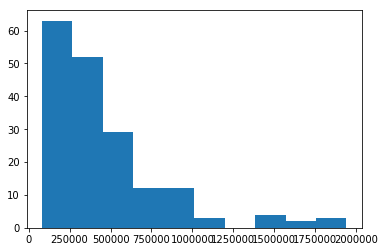

In [31]:
fig,ax = plt.subplots()
ax.hist(tidied['price'])

(array([ 3.,  8., 19., 40., 27., 35., 21., 16.,  5.,  6.]),
 array([11.31447453, 11.63084693, 11.94721933, 12.26359173, 12.57996413,
        12.89633653, 13.21270893, 13.52908133, 13.84545373, 14.16182613,
        14.47819853]),
 <a list of 10 Patch objects>)

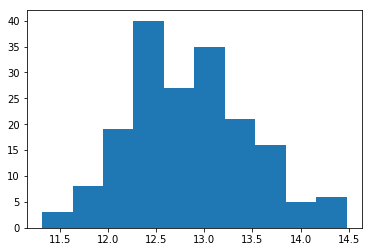

In [32]:
# Try the log
fig,ax = plt.subplots()
ax.hist(np.log(tidied['price']))

* Use Pandas to get `sales_wide2` into tidy form. Note that this is much harder than the first exercise!
* If you've tidied this data, apply the same tidying to `sales_wide2_100` and use matplotlib's `plt.plot_date()` or `ax.plot_date()` to create a scatter plot of sale price against sale date.

In [34]:
# There's more than one reasonable solution to this problem

# One approach: Melt down the variables we don't want to keep. 
# Then split the variable column to get useful groupings
melted = sales_wide2.melt(id_vars=['property_id','bedrooms'])
melted['salenum'] = melted['variable'].str[-1]
melted['variable'] = melted['variable'].str[:-1]
melted.head(10)

,property_id,bedrooms,variable,value,salenum
0,5631500400,2,date,2015-02-25 00:00:00,1
1,6021501535,3,date,2014-07-25 00:00:00,1
2,7129300520,3,date,2014-10-13 00:00:00,1
3,5631500400,2,price,180000,1
4,6021501535,3,price,430000,1
5,7129300520,3,price,221900,1
6,5631500400,2,date,NaT,2
7,6021501535,3,date,2014-12-23 00:00:00,2
8,7129300520,3,date,NaT,2
9,5631500400,2,price,NaN,2


In [35]:
# Now pivot back to get date and price as columns again
melted.pivot_table(
    index=['property_id','bedrooms','salenum'],
    columns='variable',
    values='value',
    aggfunc='first').reset_index()

variable,property_id,bedrooms,salenum,date,price
0,5631500400,2,1,2015-02-25 00:00:00,180000
1,6021501535,3,1,2014-07-25 00:00:00,430000
2,6021501535,3,2,2014-12-23 00:00:00,700000
3,7129300520,3,1,2014-10-13 00:00:00,221900


In [36]:
# Apply to larger dataset
melted = sales_wide2_100.melt(id_vars=['property_id','bedrooms'])
melted['salenum'] = melted['variable'].str[-1]
melted['variable'] = melted['variable'].str[:-1]
tidied = melted.pivot_table(
    index=['property_id','bedrooms','salenum'],
    columns='variable',
    values='value',
    aggfunc='first').reset_index()

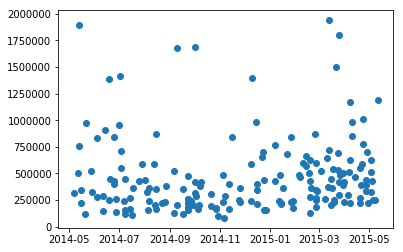

In [37]:
fig,ax = plt.subplots()
ax.plot_date(tidied['date'],tidied['price'])